In [1]:
import pandas as pd 
import numpy as np
import math
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats.stats import pearsonr
from sklearn.metrics import pairwise_distances
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
Rating = pd.read_csv('recipe_dataset1.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'recipe_dataset1.csv'

In [3]:
Rating["Event"].unique()

array(['view_recipe', 'short_description', 'long_description', 'steps',
       'view_comments'], dtype=object)

In [4]:
print("Number of User:",Rating["UserID"].nunique())
print("Number of Item:",Rating["RecipeID"].nunique())

Number of User: 1445
Number of Item: 471


In [5]:
import datetime as dt
from datetime import datetime
Today = dt.datetime.now()
#evidence['date'] = evidence['date'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))
Rating['age_in_days'] = Today - Rating['Date'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
Rating['age_in_days'] = Rating['age_in_days'].dt.days/7

#time_str = datetime.datetime.strftime(curr_time,'%Y-%m-%d %H:%M:%S')
Rating

,Date,UserID,RecipeID,Event,age_in_days
0,2022-01-10 12:06:28,1468,53,view_recipe,12.428571
1,2022-01-10 12:09:25,1468,53,short_description,12.428571
2,2022-01-10 12:11:09,1468,53,long_description,12.428571
3,2022-01-10 12:13:36,1468,53,steps,12.428571
4,2022-01-10 12:14:59,1004,250,view_recipe,12.428571
...,...,...,...,...,...
9522,2022-03-09 14:13:38,1577,259,steps,4.142857
9523,2022-03-09 14:50:31,991,39,view_recipe,4.142857
9524,2022-03-09 14:53:10,991,39,short_description,4.142857
9525,2022-03-09 14:54:29,991,39,steps,4.142857


In [6]:
eventWeights = {
    'view_recipe': 3,
    'short_description': 5,
    'long_description': 6,
    'steps': 8,
    'view_comments': 4}

Rating["rating"] = Rating["Event"].apply(lambda x: eventWeights[x])
Rating.eval('rating1 = 1/age_in_days*rating',inplace = True)
Rating["rating"] = Rating[["rating","age_in_days"]].apply(lambda x:x[0]/x[1], axis=1)
Rating

,Date,UserID,RecipeID,Event,age_in_days,rating,rating1
0,2022-01-10 12:06:28,1468,53,view_recipe,12.428571,0.241379,0.241379
1,2022-01-10 12:09:25,1468,53,short_description,12.428571,0.402299,0.402299
2,2022-01-10 12:11:09,1468,53,long_description,12.428571,0.482759,0.482759
3,2022-01-10 12:13:36,1468,53,steps,12.428571,0.643678,0.643678
4,2022-01-10 12:14:59,1004,250,view_recipe,12.428571,0.241379,0.241379
...,...,...,...,...,...,...,...
9522,2022-03-09 14:13:38,1577,259,steps,4.142857,1.931034,1.931034
9523,2022-03-09 14:50:31,991,39,view_recipe,4.142857,0.724138,0.724138
9524,2022-03-09 14:53:10,991,39,short_description,4.142857,1.206897,1.206897
9525,2022-03-09 14:54:29,991,39,steps,4.142857,1.931034,1.931034


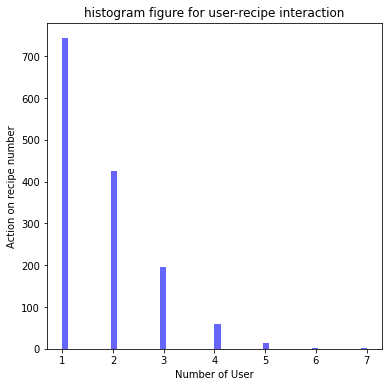

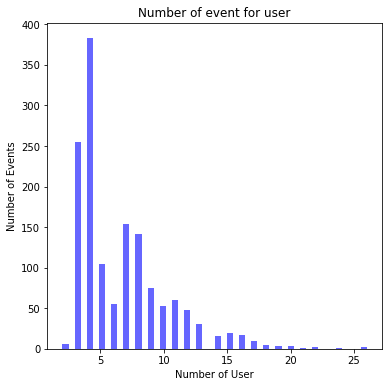

In [7]:
u2i = Rating.groupby(["UserID"])["RecipeID"].nunique().tolist()
u2r = Rating.groupby(["UserID"])["rating"].size().tolist()

plt.figure(figsize=(6,6))
plt.hist(u2i, bins=50, color='blue', alpha=0.6, density=False)
plt.xlabel('Number of User')
plt.ylabel('Action on recipe number')
plt.title('histogram figure for user-recipe interaction')
plt.show()

plt.figure(figsize=(6,6))
plt.hist(u2r, bins=50, color='blue', alpha=0.6, density=False)
plt.xlabel('Number of User')
plt.ylabel('Number of Events')
plt.title('Number of event for user')
plt.show()

In [8]:
temp = Rating.groupby(["UserID"])["RecipeID"].nunique()
temp = pd.DataFrame(temp).reset_index().rename(columns = {'RecipeID':'rating_count'})
Rating = Rating.merge(temp, how='outer', on="UserID")
Rating

,Date,UserID,RecipeID,Event,age_in_days,rating,rating1,rating_count
0,2022-01-10 12:06:28,1468,53,view_recipe,12.428571,0.241379,0.241379,3
1,2022-01-10 12:09:25,1468,53,short_description,12.428571,0.402299,0.402299,3
2,2022-01-10 12:11:09,1468,53,long_description,12.428571,0.482759,0.482759,3
3,2022-01-10 12:13:36,1468,53,steps,12.428571,0.643678,0.643678,3
4,2022-01-21 06:22:59,1468,150,view_recipe,11.000000,0.272727,0.272727,3
...,...,...,...,...,...,...,...,...
9522,2022-03-09 12:13:24,61,15,view_comments,4.142857,0.965517,0.965517,1
9523,2022-03-09 12:31:13,1203,383,view_recipe,4.142857,0.724138,0.724138,1
9524,2022-03-09 12:31:58,1203,383,short_description,4.142857,1.206897,1.206897,1
9525,2022-03-09 12:34:39,1203,383,long_description,4.142857,1.448276,1.448276,1


In [9]:
Rating1 = Rating[["UserID","RecipeID","rating"]]
temp = Rating1.groupby(["UserID","RecipeID"]).agg({"rating":sum})
temp = temp.reset_index()
temp

,UserID,RecipeID,rating
0,2,19,1.417722
1,2,175,2.081081
2,3,387,2.483871
3,4,36,3.684211
4,7,291,5.352941
...,...,...,...
2525,1995,222,2.701754
2526,1996,208,1.866667
2527,1997,363,3.756098
2528,1998,352,1.750000


In [10]:
user_list = list(Rating["UserID"].unique())
item_list = list(Rating["RecipeID"].unique())

**User-based**

In [11]:
RatingMat = temp.pivot_table(index=['UserID'],columns=['RecipeID'],values=['rating'],fill_value=0)
RatingMat

rating                                               ...            \
RecipeID    0    1    2    3    4    5    6    7    8    9    ...  490  491   
UserID                                                        ...             
2           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
7           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
8           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1995        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1996        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1997        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1998        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1999        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

                                                  
RecipeID  492  493  494  495  496  497  498  499  
UserID                                            
2         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
7         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
8         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...       ...  ...  ...  ...  ...  ...  ...  ...  
1995      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1996      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1997      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1998      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1999      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1445 rows x 471 columns]

In [12]:
given_num_of_ratings = np.count_nonzero(RatingMat)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = RatingMat.shape[0] * RatingMat.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

given_num_of_ratings =  2530
possible_num_of_ratings =  680595
density: 0.37%


In [13]:
Original_RatingMat = RatingMat.copy()
RatingMat.head()

rating                                               ...            \
RecipeID    0    1    2    3    4    5    6    7    8    9    ...  490  491   
UserID                                                        ...             
2           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
7           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
8           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

                                                  
RecipeID  492  493  494  495  496  497  498  499  
UserID                                            
2         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
7         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
8         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 471 columns]

In [14]:
RatingMat = RatingMat.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

#drop multilevel column for better usabiltity...
RatingMat.columns = RatingMat.columns.droplevel()
RatingMat.head(5)

RecipeID,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
UserID,,,,,,,,,,,,,,,,,,,,,
2,-0.003570,-0.003570,-0.003570,-0.003570,-0.003570,-0.003570,-0.003570,-0.003570,-0.003570,-0.003570,...,-0.003570,-0.003570,-0.003570,-0.003570,-0.003570,-0.003570,-0.003570,-0.003570,-0.003570,-0.003570
3,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,...,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123
4,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,...,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123,-0.002123
7,-0.003451,-0.003451,-0.003451,-0.003451,-0.003451,-0.003451,-0.003451,-0.003451,-0.003451,-0.003451,...,-0.003451,-0.003451,-0.003451,-0.003451,-0.003451,-0.003451,-0.003451,-0.003451,-0.003451,-0.003451
8,-0.003362,-0.003362,-0.003362,-0.003362,-0.003362,-0.003362,-0.003362,-0.003362,-0.003362,-0.003362,...,-0.003362,-0.003362,-0.003362,-0.003362,-0.003362,-0.003362,-0.003362,-0.003362,-0.003362,-0.003362


In [15]:
user_similarity = cosine_similarity(RatingMat)
user_sim_df = pd.DataFrame(user_similarity,index=RatingMat.index,columns=RatingMat.index)
user_sim_df.head(5)

UserID,2,3,4,7,8,11,12,13,17,18,...,1986,1987,1989,1991,1993,1995,1996,1997,1998,1999
UserID,,,,,,,,,,,,,,,,,,,,,
2,1.000000,-0.002959,-0.002959,-0.004082,-0.004051,-0.002959,-0.005103,-0.004967,-0.002959,-0.002959,...,-0.002959,-0.002959,-0.004151,-0.002959,-0.004162,-0.004108,-0.002959,-0.002959,-0.002959,-0.002959
3,-0.002959,1.000000,-0.002128,-0.002935,-0.002913,-0.002128,-0.003669,-0.003571,-0.002128,-0.002128,...,-0.002128,-0.002128,-0.002984,-0.002128,-0.002993,-0.002953,-0.002128,-0.002128,-0.002128,-0.002128
4,-0.002959,-0.002128,1.000000,-0.002935,-0.002913,-0.002128,-0.003669,-0.003571,-0.002128,-0.002128,...,-0.002128,-0.002128,-0.002984,-0.002128,-0.002993,-0.002953,-0.002128,-0.002128,-0.002128,-0.002128
7,-0.004082,-0.002935,-0.002935,1.000000,-0.004018,-0.002935,-0.005061,-0.004926,-0.002935,-0.002935,...,-0.002935,-0.002935,-0.004117,-0.002935,-0.004128,-0.004074,-0.002935,-0.002935,-0.002935,-0.002935
8,-0.004051,-0.002913,-0.002913,-0.004018,1.000000,-0.002913,-0.005022,-0.004888,-0.002913,-0.002913,...,-0.002913,-0.002913,-0.004085,-0.002913,0.535610,-0.004043,-0.002913,-0.002913,-0.002913,-0.002913


In [16]:
# 对于item i： 有user1-usern的评分矩阵[r1..rn]
# 对于user u： 有user1-usernde的相似矩阵[w1..wn]
# user u对 item i的评分预测   (w1*r1 + w2*r2 .. wn*rn)/(w1+w2+...wn)    假设[r1..rn]没有null值




In [17]:
###这个block有个小bug导致这个block只能跑一次  但后面的block可以随便跑  就如果你想产生一个新的推荐  你跑完这个之后就用后面那个block就行


uid = 3


curr_user_rated_item = Rating[(Rating.UserID == uid) & (Rating.rating != 0)]['RecipeID']
curr_user_rated_item = pd.DataFrame(curr_user_rated_item,columns=['RecipeID'])

curr_user_similarity = pd.DataFrame(user_sim_df.loc[uid])

#just changing column name as similarity for better readability.
curr_user_similarity.rename(columns={uid:'similarity'},inplace=True)
curr_user_similarity = curr_user_similarity.sort_values(by="similarity",ascending=False)
idx = curr_user_similarity.index.tolist()
RatingMat0 = RatingMat.loc[idx]
RatingMatTranspose = RatingMat0.T

RatingMatTranspose = RatingMatTranspose.loc[~RatingMatTranspose.index.isin(curr_user_rated_item.RecipeID.tolist())]   
# if ii == 0:
Original_RatingMat.columns = Original_RatingMat.columns.droplevel()     #### 小bug在这行.. 只能跑一次 然后就要注释掉
'''
calculate the weighted average a item per user so later we can show a user k specific - 
avg specific predicition rating for a item

formulas :- sum(w[1]*user1+w[2]*user2.....w[n]*userN) / w[1]+w[2]....w[n] 
'''           
Weighed_avg = []

for RecipeID in RatingMatTranspose.index:
    
    '''
    User not watched item consider as 0
    we need to remove those weight where user has not watched item in weighted sum.
    In weighted sum in denominator we need to sum all weights
    we will remove weights for those rating is 0.
    '''
    
    user_not_rated = Original_RatingMat[Original_RatingMat[RecipeID] == 0].index
    
    #calculating weights.
    # print(curr_user_similarity)
    Total_weight = np.sum(curr_user_similarity.loc[~curr_user_similarity.index.isin(user_not_rated.tolist())]['similarity'])

    
    #appending in weighted_avg list to get final list of weighted avg item.
    Weighed_avg.append(np.dot(RatingMatTranspose.loc[RecipeID],curr_user_similarity.similarity) / (Total_weight))
Weighed_avg = pd.DataFrame(Weighed_avg,columns=['weighted_avg'])
Weighed_avg.index = RatingMatTranspose.index
Weighed_avg.sort_values(by='weighted_avg',ascending=False).head(10)
top_recommendation = Weighed_avg.sort_values(by='weighted_avg',ascending=False)
print()
print("Recommendation result for userid=3:")
top_recommendation[top_recommendation.weighted_avg != -math.inf]


Recommendation result for userid=3:


,weighted_avg
RecipeID,
186,1.051242
317,1.019545
360,0.905954
126,0.902373
257,0.900440
...,...
13,-0.268441
253,-0.338908
92,-0.352200


In [18]:
#### Single case 

k = 80   ### 多少近邻  如果不使用这个条件  就把第12行那里那个.iloc[:k]删掉就行
uid = 33  ##  user-id


curr_user_rated_item = Rating[(Rating.UserID == uid) & (Rating.rating != 0)]['RecipeID']
curr_user_rated_item = pd.DataFrame(curr_user_rated_item,columns=['RecipeID'])

curr_user_similarity = pd.DataFrame(user_sim_df.loc[uid])

#just changing column name as similarity for better readability.
curr_user_similarity.rename(columns={uid:'similarity'},inplace=True)
curr_user_similarity = curr_user_similarity.sort_values(by="similarity",ascending=False).iloc[:k]
idx = curr_user_similarity.index.tolist()
RatingMat0 = RatingMat.loc[idx]
RatingMatTranspose = RatingMat0.T
# print(idx)
# print(RatingMatTranspose)
# RatingMatTranspose = RatingMatTranspose.take(idx)
RatingMatTranspose = RatingMatTranspose.loc[~RatingMatTranspose.index.isin(curr_user_rated_item.RecipeID.tolist())]
# if ii == 0:
# Original_RatingMat.columns = Original_RatingMat.columns.droplevel()
'''
calculate the weighted average a item per user so later we can show a user k specific - 
avg specific predicition rating for a item

formulas :- sum(w[1]*user1+w[2]*user2.....w[n]*userN) / w[1]+w[2]....w[n] 
'''           
Weighed_avg = []

for RecipeID in RatingMatTranspose.index:
    
    '''
    User not watched item consider as 0
    we need to remove those weight where user has not watched item in weighted sum.
    In weighted sum in denominator we need to sum all weights
    we will remove weights for those rating is 0.
    '''
    
    user_not_rated = Original_RatingMat[Original_RatingMat[RecipeID] == 0].index
    
    #calculating weights.
    # print(curr_user_similarity)
    Total_weight = np.sum(curr_user_similarity.loc[~curr_user_similarity.index.isin(user_not_rated.tolist())]['similarity'])

    
    #appending in weighted_avg list to get final list of weighted avg item.
    Weighed_avg.append(np.dot(RatingMatTranspose.loc[RecipeID],curr_user_similarity.similarity) / (Total_weight))
Weighed_avg = pd.DataFrame(Weighed_avg,columns=['weighted_avg'])
Weighed_avg.index = RatingMatTranspose.index
Weighed_avg.sort_values(by='weighted_avg',ascending=False).head(10)
top_recommendation = Weighed_avg.sort_values(by='weighted_avg',ascending=False)
top_recommendation
print()
print("Recommendation result for userid=33:")
top_recommendation[top_recommendation.weighted_avg != -math.inf]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars



Recommendation result for userid=33:


,weighted_avg
RecipeID,
2,12.010756
5,12.010756
7,12.010756
8,12.010756
14,12.010756
...,...
180,0.206872
258,0.119422
185,0.077144


**k-nearest**

Loop

In [19]:
k = 3
# def recommend(Rating,uid,RatingMat,user_sim_df,Original_RatingMat):


itable = {i:0 for i in item_list}
leng = list()
for ii in tqdm(range(len(user_list))):
  uid = user_list[ii]
  curr_user_rated_item = Rating[(Rating.UserID == uid) & (Rating.rating != 0)]['RecipeID']
  curr_user_rated_item = pd.DataFrame(curr_user_rated_item,columns=['RecipeID'])

  curr_user_similarity = pd.DataFrame(user_sim_df.loc[uid])

  #just changing column name as similarity for better readability.
  curr_user_similarity.rename(columns={uid:'similarity'},inplace=True)
  curr_user_similarity = curr_user_similarity.sort_values(by="similarity",ascending=False).iloc[:k]
  idx = curr_user_similarity.index.tolist()
  RatingMat0 = RatingMat.loc[idx]
  RatingMatTranspose = RatingMat0.T
  # print(idx)
  # print(RatingMatTranspose)
  # RatingMatTranspose = RatingMatTranspose.take(idx)
  RatingMatTranspose = RatingMatTranspose.loc[~RatingMatTranspose.index.isin(curr_user_rated_item.RecipeID.tolist())]
  # if ii == 0:
  #   Original_RatingMat.columns = Original_RatingMat.columns.droplevel()
  '''
calculate the weighted average a item per user so later we can show a user k specific - 
avg specific predicition rating for a item

formulas :- sum(w[1]*user1+w[2]*user2.....w[n]*userN) / w[1]+w[2]....w[n] 
'''           
  Weighed_avg = []

  for RecipeID in RatingMatTranspose.index:
      
      '''
      User not watched item consider as 0
      we need to remove those weight where user has not watched item in weighted sum.
      In weighted sum in denominator we need to sum all weights
      we will remove weights for those rating is 0.
      '''
      
      user_not_rated = Original_RatingMat[Original_RatingMat[RecipeID] == 0].index
      
      #calculating weights.
      # print(curr_user_similarity)
      Total_weight = np.sum(curr_user_similarity.loc[~curr_user_similarity.index.isin(user_not_rated.tolist())]['similarity'])

      
      #appending in weighted_avg list to get final list of weighted avg item.
      Weighed_avg.append(np.dot(RatingMatTranspose.loc[RecipeID],curr_user_similarity.similarity) / (Total_weight))
  Weighed_avg = pd.DataFrame(Weighed_avg,columns=['weighted_avg'])
  Weighed_avg.index = RatingMatTranspose.index
  Weighed_avg.sort_values(by='weighted_avg',ascending=False).head(10)
  top_recommendation = Weighed_avg.sort_values(by='weighted_avg',ascending=False)
  rec_item = top_recommendation[top_recommendation.weighted_avg != -math.inf].index.tolist()
  for jj in rec_item:
    itable[jj] += 1
  top0 = top_recommendation[top_recommendation.weighted_avg.isin([0,-math.inf])]
  
  leng.append(top_recommendation.shape[0]-top0.shape[0])
  # return top_recommendation

100%|██████████| 1445/1445 [26:06<00:00,  1.08s/it]


In [20]:
print("coverage rate",1 - leng.count(0)/len(user_list))

coverage rate 0.3916955017301038


In [21]:
in_rec = [i for i in itable if itable[i] > 0]
print("item coverage rate",len(in_rec)/len(item_list))

item coverage rate 0.7112526539278131


In [22]:
k = 5
# def recommend(Rating,uid,RatingMat,user_sim_df,Original_RatingMat):


itable = {i:0 for i in item_list}
leng = list()
for ii in tqdm(range(len(user_list))):
  uid = user_list[ii]
  curr_user_rated_item = Rating[(Rating.UserID == uid) & (Rating.rating != 0)]['RecipeID']
  curr_user_rated_item = pd.DataFrame(curr_user_rated_item,columns=['RecipeID'])

  curr_user_similarity = pd.DataFrame(user_sim_df.loc[uid])

  #just changing column name as similarity for better readability.
  curr_user_similarity.rename(columns={uid:'similarity'},inplace=True)
  curr_user_similarity = curr_user_similarity.sort_values(by="similarity",ascending=False).iloc[:k]
  idx = curr_user_similarity.index.tolist()
  RatingMat0 = RatingMat.loc[idx]
  RatingMatTranspose = RatingMat0.T
  # print(idx)
  # print(RatingMatTranspose)
  # RatingMatTranspose = RatingMatTranspose.take(idx)
  RatingMatTranspose = RatingMatTranspose.loc[~RatingMatTranspose.index.isin(curr_user_rated_item.RecipeID.tolist())]
  # if ii == 0:
  #   Original_RatingMat.columns = Original_RatingMat.columns.droplevel()
  '''
calculate the weighted average a item per user so later we can show a user k specific - 
avg specific predicition rating for a item

formulas :- sum(w[1]*user1+w[2]*user2.....w[n]*userN) / w[1]+w[2]....w[n] 
'''           
  Weighed_avg = []

  for RecipeID in RatingMatTranspose.index:
      
      '''
      User not watched item consider as 0
      we need to remove those weight where user has not watched item in weighted sum.
      In weighted sum in denominator we need to sum all weights
      we will remove weights for those rating is 0.
      '''
      
      user_not_rated = Original_RatingMat[Original_RatingMat[RecipeID] == 0].index
      
      #calculating weights.
      # print(curr_user_similarity)
      Total_weight = np.sum(curr_user_similarity.loc[~curr_user_similarity.index.isin(user_not_rated.tolist())]['similarity'])

      
      #appending in weighted_avg list to get final list of weighted avg item.
      Weighed_avg.append(np.dot(RatingMatTranspose.loc[RecipeID],curr_user_similarity.similarity) / (Total_weight))
  Weighed_avg = pd.DataFrame(Weighed_avg,columns=['weighted_avg'])
  Weighed_avg.index = RatingMatTranspose.index
  Weighed_avg.sort_values(by='weighted_avg',ascending=False).head(10)
  top_recommendation = Weighed_avg.sort_values(by='weighted_avg',ascending=False)
  rec_item = top_recommendation[top_recommendation.weighted_avg != -math.inf].index.tolist()
  for jj in rec_item:
    itable[jj] += 1
  top0 = top_recommendation[top_recommendation.weighted_avg.isin([0,-math.inf])]
  
  leng.append(top_recommendation.shape[0]-top0.shape[0])

100%|██████████| 1445/1445 [26:21<00:00,  1.09s/it]


In [23]:
print("coverage rate",1 - leng.count(0)/len(user_list))
print("minimum recommend",min(leng))

in_rec = [i for i in itable if itable[i] > 0]
print("item coverage rate",len(in_rec)/len(item_list))

coverage rate 0.8186851211072664
minimum recommend 0
item coverage rate 0.9087048832271762


In [24]:
k = 10
itable = {i:0 for i in item_list}
leng = list()
for ii in tqdm(range(len(user_list))):
  uid = user_list[ii]
  curr_user_rated_item = Rating[(Rating.UserID == uid) & (Rating.rating != 0)]['RecipeID']
  curr_user_rated_item = pd.DataFrame(curr_user_rated_item,columns=['RecipeID'])

  curr_user_similarity = pd.DataFrame(user_sim_df.loc[uid])

  #just changing column name as similarity for better readability.
  curr_user_similarity.rename(columns={uid:'similarity'},inplace=True)
  curr_user_similarity = curr_user_similarity.sort_values(by="similarity",ascending=False).iloc[:k]
  idx = curr_user_similarity.index.tolist()
  RatingMat0 = RatingMat.loc[idx]
  RatingMatTranspose = RatingMat0.T
  # print(idx)
  # print(RatingMatTranspose)
  # RatingMatTranspose = RatingMatTranspose.take(idx)
  RatingMatTranspose = RatingMatTranspose.loc[~RatingMatTranspose.index.isin(curr_user_rated_item.RecipeID.tolist())]
  # if ii == 0:
  #   Original_RatingMat.columns = Original_RatingMat.columns.droplevel()
  '''
calculate the weighted average a item per user so later we can show a user k specific - 
avg specific predicition rating for a item

formulas :- sum(w[1]*user1+w[2]*user2.....w[n]*userN) / w[1]+w[2]....w[n] 
'''           
  Weighed_avg = []

  for RecipeID in RatingMatTranspose.index:
      
      '''
      User not watched item consider as 0
      we need to remove those weight where user has not watched item in weighted sum.
      In weighted sum in denominator we need to sum all weights
      we will remove weights for those rating is 0.
      '''
      
      user_not_rated = Original_RatingMat[Original_RatingMat[RecipeID] == 0].index
      
      #calculating weights.
      # print(curr_user_similarity)
      Total_weight = np.sum(curr_user_similarity.loc[~curr_user_similarity.index.isin(user_not_rated.tolist())]['similarity'])

      
      #appending in weighted_avg list to get final list of weighted avg item.
      Weighed_avg.append(np.dot(RatingMatTranspose.loc[RecipeID],curr_user_similarity.similarity) / (Total_weight))
  Weighed_avg = pd.DataFrame(Weighed_avg,columns=['weighted_avg'])
  Weighed_avg.index = RatingMatTranspose.index
  Weighed_avg.sort_values(by='weighted_avg',ascending=False).head(10)
  top_recommendation = Weighed_avg.sort_values(by='weighted_avg',ascending=False)
  rec_item = top_recommendation[top_recommendation.weighted_avg != -math.inf].index.tolist()
  for jj in rec_item:
    itable[jj] += 1
  top0 = top_recommendation[top_recommendation.weighted_avg.isin([0,-math.inf])]
  
  leng.append(top_recommendation.shape[0]-top0.shape[0])

print()
print("coverage rate",1 - leng.count(0)/len(user_list))
print("minimum recommend",min(leng))

in_rec = [i for i in itable if itable[i] > 0]
print("item coverage rate",len(in_rec)/len(item_list))

100%|██████████| 1445/1445 [26:11<00:00,  1.09s/it]


coverage rate 0.9979238754325259
minimum recommend 0
item coverage rate 0.9596602972399151


In [25]:
k = 13
# def recommend(Rating,uid,RatingMat,user_sim_df,Original_RatingMat):

itable = {i:0 for i in item_list}
leng = list()
for ii in tqdm(range(len(user_list))):
  uid = user_list[ii]
  curr_user_rated_item = Rating[(Rating.UserID == uid) & (Rating.rating != 0)]['RecipeID']
  curr_user_rated_item = pd.DataFrame(curr_user_rated_item,columns=['RecipeID'])

  curr_user_similarity = pd.DataFrame(user_sim_df.loc[uid])

  #just changing column name as similarity for better readability.
  curr_user_similarity.rename(columns={uid:'similarity'},inplace=True)
  curr_user_similarity = curr_user_similarity.sort_values(by="similarity",ascending=False).iloc[:k]
  idx = curr_user_similarity.index.tolist()
  RatingMat0 = RatingMat.loc[idx]
  RatingMatTranspose = RatingMat0.T
  # print(idx)
  # print(RatingMatTranspose)
  # RatingMatTranspose = RatingMatTranspose.take(idx)
  RatingMatTranspose = RatingMatTranspose.loc[~RatingMatTranspose.index.isin(curr_user_rated_item.RecipeID.tolist())]
  # if ii == 0:
  #   Original_RatingMat.columns = Original_RatingMat.columns.droplevel()
  '''
calculate the weighted average a item per user so later we can show a user k specific - 
avg specific predicition rating for a item

formulas :- sum(w[1]*user1+w[2]*user2.....w[n]*userN) / w[1]+w[2]....w[n] 
'''           
  Weighed_avg = []

  for RecipeID in RatingMatTranspose.index:
      
      '''
      User not watched item consider as 0
      we need to remove those weight where user has not watched item in weighted sum.
      In weighted sum in denominator we need to sum all weights
      we will remove weights for those rating is 0.
      '''
      
      user_not_rated = Original_RatingMat[Original_RatingMat[RecipeID] == 0].index
      
      #calculating weights.
      # print(curr_user_similarity)
      Total_weight = np.sum(curr_user_similarity.loc[~curr_user_similarity.index.isin(user_not_rated.tolist())]['similarity'])

      
      #appending in weighted_avg list to get final list of weighted avg item.
      Weighed_avg.append(np.dot(RatingMatTranspose.loc[RecipeID],curr_user_similarity.similarity) / (Total_weight))
  Weighed_avg = pd.DataFrame(Weighed_avg,columns=['weighted_avg'])
  Weighed_avg.index = RatingMatTranspose.index
  Weighed_avg.sort_values(by='weighted_avg',ascending=False).head(10)
  top_recommendation = Weighed_avg.sort_values(by='weighted_avg',ascending=False)
  rec_item = top_recommendation[top_recommendation.weighted_avg != -math.inf].index.tolist()
  for jj in rec_item:
    itable[jj] += 1
  top0 = top_recommendation[top_recommendation.weighted_avg.isin([0,-math.inf])]
  
  leng.append(top_recommendation.shape[0]-top0.shape[0])

print()
print("coverage rate",1 - leng.count(0)/len(user_list))
print("minimum recommend",min(leng))

in_rec = [i for i in itable if itable[i] > 0]
print("item coverage rate",len(in_rec)/len(item_list))

100%|██████████| 1445/1445 [26:55<00:00,  1.12s/it]


coverage rate 1.0
minimum recommend 2
item coverage rate 0.9787685774946921


In [26]:
k = 14

itable = {i:0 for i in item_list}
leng = list()
for ii in tqdm(range(len(user_list))):
  uid = user_list[ii]
  curr_user_rated_item = Rating[(Rating.UserID == uid) & (Rating.rating != 0)]['RecipeID']
  curr_user_rated_item = pd.DataFrame(curr_user_rated_item,columns=['RecipeID'])

  curr_user_similarity = pd.DataFrame(user_sim_df.loc[uid])

  #just changing column name as similarity for better readability.
  curr_user_similarity.rename(columns={uid:'similarity'},inplace=True)
  curr_user_similarity = curr_user_similarity.sort_values(by="similarity",ascending=False).iloc[:k]
  idx = curr_user_similarity.index.tolist()
  RatingMat0 = RatingMat.loc[idx]
  RatingMatTranspose = RatingMat0.T
  # print(idx)
  # print(RatingMatTranspose)
  # RatingMatTranspose = RatingMatTranspose.take(idx)
  RatingMatTranspose = RatingMatTranspose.loc[~RatingMatTranspose.index.isin(curr_user_rated_item.RecipeID.tolist())]
  # if ii == 0:
  #   Original_RatingMat.columns = Original_RatingMat.columns.droplevel()
  '''
calculate the weighted average a item per user so later we can show a user k specific - 
avg specific predicition rating for a item

formulas :- sum(w[1]*user1+w[2]*user2.....w[n]*userN) / w[1]+w[2]....w[n] 
'''           
  Weighed_avg = []

  for RecipeID in RatingMatTranspose.index:
      
      '''
      User not watched item consider as 0
      we need to remove those weight where user has not watched item in weighted sum.
      In weighted sum in denominator we need to sum all weights
      we will remove weights for those rating is 0.
      '''
      
      user_not_rated = Original_RatingMat[Original_RatingMat[RecipeID] == 0].index
      
      #calculating weights.
      # print(curr_user_similarity)
      Total_weight = np.sum(curr_user_similarity.loc[~curr_user_similarity.index.isin(user_not_rated.tolist())]['similarity'])

      
      #appending in weighted_avg list to get final list of weighted avg item.
      Weighed_avg.append(np.dot(RatingMatTranspose.loc[RecipeID],curr_user_similarity.similarity) / (Total_weight))
  Weighed_avg = pd.DataFrame(Weighed_avg,columns=['weighted_avg'])
  Weighed_avg.index = RatingMatTranspose.index
  Weighed_avg.sort_values(by='weighted_avg',ascending=False).head(10)
  top_recommendation = Weighed_avg.sort_values(by='weighted_avg',ascending=False)
  rec_item = top_recommendation[top_recommendation.weighted_avg != -math.inf].index.tolist()
  for jj in rec_item:
    itable[jj] += 1
  top0 = top_recommendation[top_recommendation.weighted_avg.isin([0,-math.inf])]
  
  leng.append(top_recommendation.shape[0]-top0.shape[0])

print()
print("coverage rate",1 - leng.count(0)/len(user_list))
print("minimum recommend",min(leng))

in_rec = [i for i in itable if itable[i] > 0]
print("item coverage rate",len(in_rec)/len(item_list))

100%|██████████| 1445/1445 [26:49<00:00,  1.11s/it]


coverage rate 1.0
minimum recommend 2
item coverage rate 0.9830148619957537


**Item-based**

In [27]:
pivot = temp.pivot_table(index=['RecipeID'], columns=['UserID'], values='rating')
pivot.head()

UserID,2,3,4,7,8,11,12,13,17,18,...,1986,1987,1989,1991,1993,1995,1996,1997,1998,1999
RecipeID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
pivot_norm = pivot.apply(lambda x: x - np.nanmean(x), axis=1)
pivot_norm.fillna(0, inplace=True)
pivot_norm.head()

UserID,2,3,4,7,8,11,12,13,17,18,...,1986,1987,1989,1991,1993,1995,1996,1997,1998,1999
RecipeID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
item_sim_df = pd.DataFrame(cosine_similarity(pivot_norm, pivot_norm), index=pivot_norm.index, columns=pivot_norm.index)
item_sim_df.head()

RecipeID,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
RecipeID,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
def get_similar_item(RecipeID):
    if RecipeID not in pivot_norm.index:
        return None, None
    else:
        sim_items = item_sim_df.sort_values(by=RecipeID, ascending=False).index[1:]
        sim_score = item_sim_df.sort_values(by=RecipeID, ascending=False).loc[:, RecipeID].tolist()[1:]
        return sim_items, sim_score

In [31]:
iid = 12

items, score = get_similar_item(iid)
for x,y in zip(items[:10], score[:10]):
    print("{} with similarity of {}".format(x, y))

176 with similarity of 0.2644492511311836
315 with similarity of 0.2012123420372657
2 with similarity of 0.08461491120373786
338 with similarity of 0.0
334 with similarity of 0.0
335 with similarity of 0.0
336 with similarity of 0.0
337 with similarity of 0.0
339 with similarity of 0.0
332 with similarity of 0.0


In [32]:
def predict_rating(user_id, RecipeID, max_neighbor=25):
    animes, scores = get_similar_item(RecipeID)
    anime_arr = np.array([x for x in animes])
    sim_arr = np.array([x for x in scores])
    
    # select only the anime that has already rated by user x
    filtering = pivot_norm[user_id].loc[anime_arr] != 0
    
    # calculate the predicted score
    s = np.dot(sim_arr[filtering][:max_neighbor], pivot[user_id].loc[anime_arr[filtering][:max_neighbor]]) \
            / np.sum(sim_arr[filtering][:max_neighbor])
   
    return s

In [33]:
def get_recommendation(user_id):
    predicted_rating = np.array([])
    
    for _anime in pivot_norm.index:
        predicted_rating = np.append(predicted_rating, predict_rating(user_id, _anime))
    
    # don't recommend something that user has already rated
    temp = pd.DataFrame({'predicted':predicted_rating, 'name':pivot_norm.index})
    filtering = (pivot_norm[user_id] == 0.0)
    temp = temp.loc[filtering.values].sort_values(by='predicted', ascending=False)

    # recommend n_anime anime
    return temp

In [34]:
res = get_recommendation(3)
res[res.predicted.isnull() == False]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,predicted,name
71,2.483871,73
134,2.483871,143
175,2.483871,186
176,2.483871,188
296,2.483871,317
335,2.483871,357
382,2.483871,406


In [35]:
leng = list()
itable = {i:0 for i in item_list}
for ii in tqdm(range(len(user_list))):
  uid = user_list[ii]
  rec = get_recommendation(uid)
  rec = rec[rec.predicted.isnull() == False]
  norec = rec.shape[0]
  for jj in rec["name"].tolist():
    itable[jj] += 1 
  leng.append(norec)

print()
print("Cover Rate", 1 - leng.count(0)/len(user_list))
print("minimum no of res", min(leng))
in_rec = [i for i in itable if itable[i] > 0]
print("item coverage rate",len(in_rec)/len(item_list))

  0%|          | 0/1445 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
100%|██████████| 1445/1445 [28:19<00:00,  1.18s/it]


Cover Rate 0.9792387543252595
minimum no of res 0
item coverage rate 0.8747346072186837


In [36]:
k = 3

def predict_rating(user_id, RecipeID, max_neighbor=k):
    animes, scores = get_similar_item(RecipeID)
    anime_arr = np.array([x for x in animes])
    sim_arr = np.array([x for x in scores])
    
    # select only the anime that has already rated by user x
    filtering = pivot_norm[user_id].loc[anime_arr] != 0
    
    # calculate the predicted score
    s = np.dot(sim_arr[filtering][:max_neighbor], pivot[user_id].loc[anime_arr[filtering][:max_neighbor]]) \
            / np.sum(sim_arr[filtering][:max_neighbor])
    
    return s

def get_recommendation(user_id):
    predicted_rating = np.array([])
    
    for _anime in pivot_norm.index:
        predicted_rating = np.append(predicted_rating, predict_rating(user_id, _anime))
    
    # don't recommend something that user has already rated
    temp = pd.DataFrame({'predicted':predicted_rating, 'name':pivot_norm.index})
    filtering = (pivot_norm[user_id] == 0.0)
    temp = temp.loc[filtering.values].sort_values(by='predicted', ascending=False)

    # recommend n_anime anime
    return temp


leng = list()
itable = {i:0 for i in item_list}
for ii in tqdm(range(len(user_list))):
  uid = user_list[ii]
  rec = get_recommendation(uid)
  rec = rec[rec.predicted.isnull() == False]
  norec = rec.shape[0]
  for jj in rec["name"].tolist():
    itable[jj] += 1 
  leng.append(norec)

print()
print("Cover Rate", 1 - leng.count(0)/len(user_list))
print("minimum no of res", min(leng))
in_rec = [i for i in itable if itable[i] > 0]
print("item coverage rate",len(in_rec)/len(item_list))

  0%|          | 0/1445 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
100%|██████████| 1445/1445 [28:15<00:00,  1.17s/it]


Cover Rate 0.9792387543252595
minimum no of res 0
item coverage rate 0.8747346072186837


In [37]:
k = 5

def predict_rating(user_id, RecipeID, max_neighbor=k):
    animes, scores = get_similar_item(RecipeID)
    anime_arr = np.array([x for x in animes])
    sim_arr = np.array([x for x in scores])
    
    # select only the anime that has already rated by user x
    filtering = pivot_norm[user_id].loc[anime_arr] != 0
    
    # calculate the predicted score
    s = np.dot(sim_arr[filtering][:max_neighbor], pivot[user_id].loc[anime_arr[filtering][:max_neighbor]]) \
            / np.sum(sim_arr[filtering][:max_neighbor])
    
    return s

def get_recommendation(user_id):
    predicted_rating = np.array([])
    
    for _anime in pivot_norm.index:
        predicted_rating = np.append(predicted_rating, predict_rating(user_id, _anime))
    
    # don't recommend something that user has already rated
    temp = pd.DataFrame({'predicted':predicted_rating, 'name':pivot_norm.index})
    filtering = (pivot_norm[user_id] == 0.0)
    temp = temp.loc[filtering.values].sort_values(by='predicted', ascending=False)

    # recommend n_anime anime
    return temp


leng = list()
itable = {i:0 for i in item_list}
for ii in tqdm(range(len(user_list))):
  uid = user_list[ii]
  rec = get_recommendation(uid)
  rec = rec[rec.predicted.isnull() == False]
  norec = rec.shape[0]
  for jj in rec["name"].tolist():
    itable[jj] += 1 
  leng.append(norec)

print()
print("Cover Rate", 1 - leng.count(0)/len(user_list))
print("minimum no of res", min(leng))
in_rec = [i for i in itable if itable[i] > 0]
print("item coverage rate",len(in_rec)/len(item_list))

  0%|          | 0/1445 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
100%|██████████| 1445/1445 [28:14<00:00,  1.17s/it]


Cover Rate 0.9792387543252595
minimum no of res 0
item coverage rate 0.8747346072186837


In [38]:
k = 10

def predict_rating(user_id, RecipeID, max_neighbor=k):
    animes, scores = get_similar_item(RecipeID)
    anime_arr = np.array([x for x in animes])
    sim_arr = np.array([x for x in scores])
    
    # select only the anime that has already rated by user x
    filtering = pivot_norm[user_id].loc[anime_arr] != 0
    
    # calculate the predicted score
    s = np.dot(sim_arr[filtering][:max_neighbor], pivot[user_id].loc[anime_arr[filtering][:max_neighbor]]) \
            / np.sum(sim_arr[filtering][:max_neighbor])
    
    return s

def get_recommendation(user_id):
    predicted_rating = np.array([])
    
    for _anime in pivot_norm.index:
        predicted_rating = np.append(predicted_rating, predict_rating(user_id, _anime))
    
    # don't recommend something that user has already rated
    temp = pd.DataFrame({'predicted':predicted_rating, 'name':pivot_norm.index})
    filtering = (pivot_norm[user_id] == 0.0)
    temp = temp.loc[filtering.values].sort_values(by='predicted', ascending=False)

    # recommend n_anime anime
    return temp


leng = list()
itable = {i:0 for i in item_list}
for ii in tqdm(range(len(user_list))):
  uid = user_list[ii]
  rec = get_recommendation(uid)
  rec = rec[rec.predicted.isnull() == False]
  norec = rec.shape[0]
  for jj in rec["name"].tolist():
    itable[jj] += 1 
  leng.append(norec)

print()
print("Cover Rate", 1 - leng.count(0)/len(user_list))
print("minimum no of res", min(leng))
in_rec = [i for i in itable if itable[i] > 0]
print("item coverage rate",len(in_rec)/len(item_list))

  0%|          | 0/1445 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
100%|██████████| 1445/1445 [28:18<00:00,  1.18s/it]


Cover Rate 0.9792387543252595
minimum no of res 0
item coverage rate 0.8747346072186837


In [39]:
k = 30

def predict_rating(user_id, RecipeID, max_neighbor=k):
    animes, scores = get_similar_item(RecipeID)
    anime_arr = np.array([x for x in animes])
    sim_arr = np.array([x for x in scores])
    
    # select only the anime that has already rated by user x
    filtering = pivot_norm[user_id].loc[anime_arr] != 0
    
    # calculate the predicted score
    s = np.dot(sim_arr[filtering][:max_neighbor], pivot[user_id].loc[anime_arr[filtering][:max_neighbor]]) \
            / np.sum(sim_arr[filtering][:max_neighbor])
    
    return s

def get_recommendation(user_id):
    predicted_rating = np.array([])
    
    for _anime in pivot_norm.index:
        predicted_rating = np.append(predicted_rating, predict_rating(user_id, _anime))
    
    # don't recommend something that user has already rated
    temp = pd.DataFrame({'predicted':predicted_rating, 'name':pivot_norm.index})
    filtering = (pivot_norm[user_id] == 0.0)
    temp = temp.loc[filtering.values].sort_values(by='predicted', ascending=False)

    # recommend n_anime anime
    return temp


leng = list()
itable = {i:0 for i in item_list}
for ii in tqdm(range(len(user_list))):
  uid = user_list[ii]
  rec = get_recommendation(uid)
  rec = rec[rec.predicted.isnull() == False]
  norec = rec.shape[0]
  for jj in rec["name"].tolist():
    itable[jj] += 1 
  leng.append(norec)

print()
print("Cover Rate", 1 - leng.count(0)/len(user_list))
print("minimum no of res", min(leng))
in_rec = [i for i in itable if itable[i] > 0]
print("item coverage rate",len(in_rec)/len(item_list))

  0%|          | 0/1445 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
100%|██████████| 1445/1445 [28:12<00:00,  1.17s/it]


Cover Rate 0.9792387543252595
minimum no of res 0
item coverage rate 0.8747346072186837


In [40]:
k = 150

def predict_rating(user_id, RecipeID, max_neighbor=k):
    animes, scores = get_similar_item(RecipeID)
    anime_arr = np.array([x for x in animes])
    sim_arr = np.array([x for x in scores])
    
    # select only the anime that has already rated by user x
    filtering = pivot_norm[user_id].loc[anime_arr] != 0
    
    # calculate the predicted score
    s = np.dot(sim_arr[filtering][:max_neighbor], pivot[user_id].loc[anime_arr[filtering][:max_neighbor]]) \
            / np.sum(sim_arr[filtering][:max_neighbor])
    
    return s

def get_recommendation(user_id):
    predicted_rating = np.array([])
    
    for _anime in pivot_norm.index:
        predicted_rating = np.append(predicted_rating, predict_rating(user_id, _anime))
    
    # don't recommend something that user has already rated
    temp = pd.DataFrame({'predicted':predicted_rating, 'name':pivot_norm.index})
    filtering = (pivot_norm[user_id] == 0.0)
    temp = temp.loc[filtering.values].sort_values(by='predicted', ascending=False)

    # recommend n_anime anime
    return temp


leng = list()
itable = {i:0 for i in item_list}
for ii in tqdm(range(len(user_list))):
  uid = user_list[ii]
  rec = get_recommendation(uid)
  rec = rec[rec.predicted.isnull() == False]
  norec = rec.shape[0]
  for jj in rec["name"].tolist():
    itable[jj] += 1 
  leng.append(norec)

print()
print("Cover Rate", 1 - leng.count(0)/len(user_list))
print("minimum no of res", min(leng))
in_rec = [i for i in itable if itable[i] > 0]
print("item coverage rate",len(in_rec)/len(item_list))

  0%|          | 0/1445 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
100%|██████████| 1445/1445 [28:15<00:00,  1.17s/it]


Cover Rate 0.9792387543252595
minimum no of res 0
item coverage rate 0.8747346072186837


## Evaluation